In [727]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

plt.style.use('bmh')
df = pd.read_csv('insurance.csv')

# Exploration du dataset

## Valeurs nulles

In [728]:
#Check empty values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


On voit qu'aucune donn√©e n'est manquante dans le jeu de donn√©es.
Il nous faudra voir si toutes les donn√©es sont pertinentes, mais pour le moment, nous n'avons pas √† en supprimer.

## Cast des donn√©es de certaines colonnes

Afin de pouvoir analyser des donn√©es sous formes d'histogrammes, nous allons devoir transformer les donn√©es textuelles en int.
Il s'agit de "sex", "smoker" et "region". 
sex_male : male -> 1 et female -> 0
smoker_yes : no -> 0 et yes -> 1
region =>\nsouthwest -> 0, southeast -> 1, northwest -> 2, northeast -> 3

In [729]:
#Parse string to int
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
df['region'] = df['region'].replace({'southwest': 0, 'southeast': 1, 'northwest':2, 'northeast':3})

## Boxplots

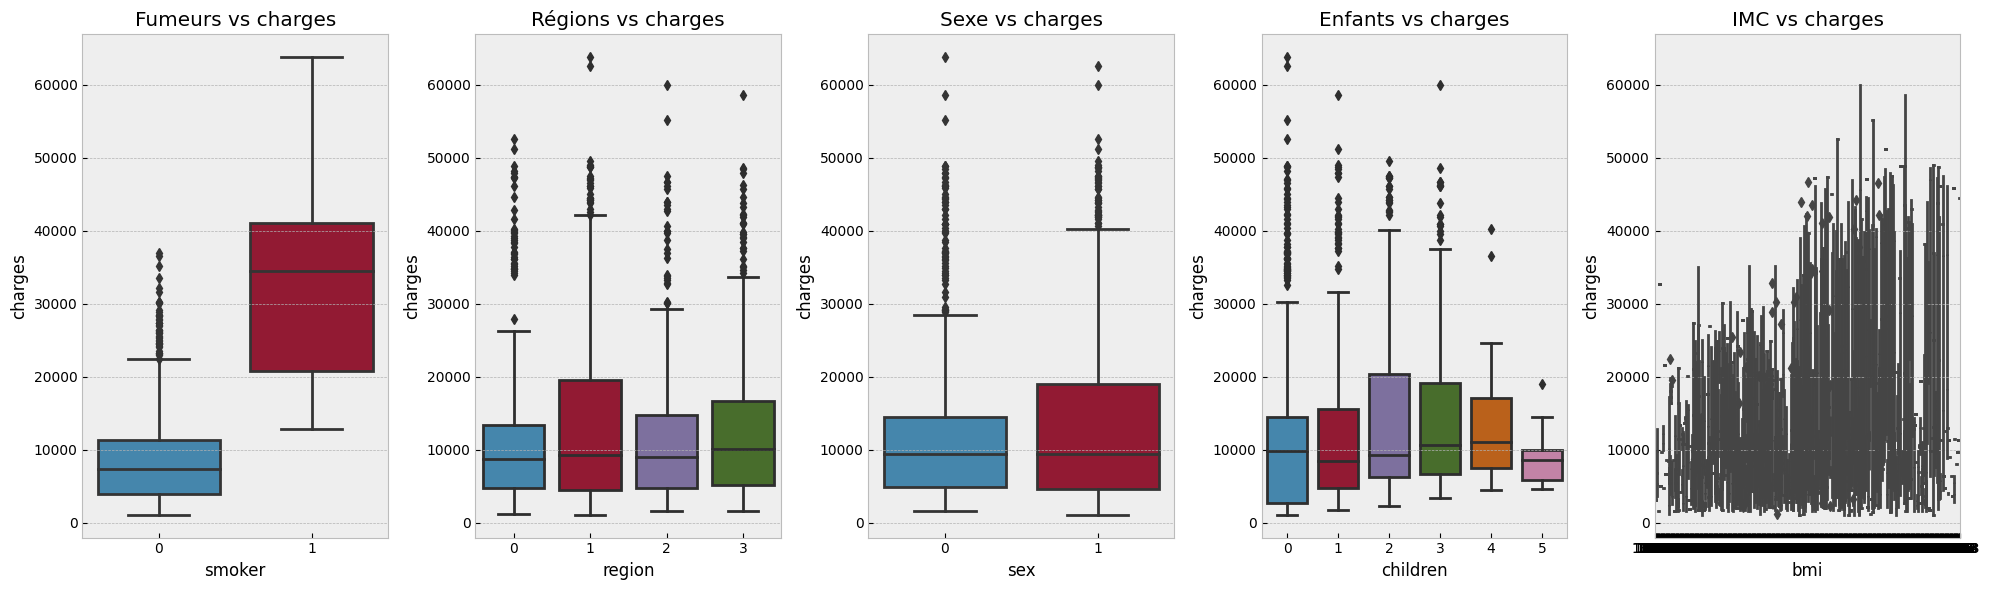

In [730]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0])
axes[0].set_title('Fumeurs vs charges')
df.groupby('smoker').agg(['mean','min','max'])['charges']

sns.boxplot(x='region', y='charges', data=df, ax=axes[1])
axes[1].set_title('R√©gions vs charges')
df.groupby('region').agg(['mean','min','max'])['charges']

sns.boxplot(x='sex', y='charges', data=df, ax=axes[2])
axes[2].set_title('Sexe vs charges')
df.groupby('sex').agg(['mean','min','max'])['charges']

sns.boxplot(x='children', y='charges', data=df, ax=axes[3])
axes[3].set_title('Enfants vs charges')
df.groupby('children').agg(['mean','min','max'])['charges']

sns.boxplot(x='bmi', y='charges', data=df, ax=axes[4])
axes[4].set_title('IMC vs charges')
df.groupby('bmi').agg(['mean','min','max'])['charges']

plt.tight_layout()

La m√©diane des charges des non-fumeurs est tr√®s largement inf√©rieure √† celles des fumeurs.
Aussi, la valeur maximimale de charges pay√©es par un fumeur est de 63770‚Ç¨ contrairement aux non fumeurs, situ√©es √† un peu moins de 40000‚Ç¨. 

Ce boxplot nous indique donc que les deux groupes ont des distributions de charges diff√©rentes, sans pour autant impliquer que le tabagisme est la cause de cette diff√©rence. En effet, il est possible que d'autres facteurs tels que l'√¢ge, le sexe, le r√©gime alimentaire ou les ant√©c√©dents m√©dicaux puissent influencer les niveaux de charges dans les deux groupes.

On peut remarquer que la m√©diane de charges m√©dicales pay√©es est √©gale pour tous les boxplots repr√©sentant chaque r√©gion.

On peut remarquer que la m√©diane de charges m√©dicales pay√©es est √©gale pour les boxplots de sexe f√©minin et masculin.

A interpreter

A interpreter
Pk c'est pas un boxplot comme les autres ?

In [731]:
#Scatter Matrix plot
#sns.pairplot(df)

A interpr√©ter

## Pairplots

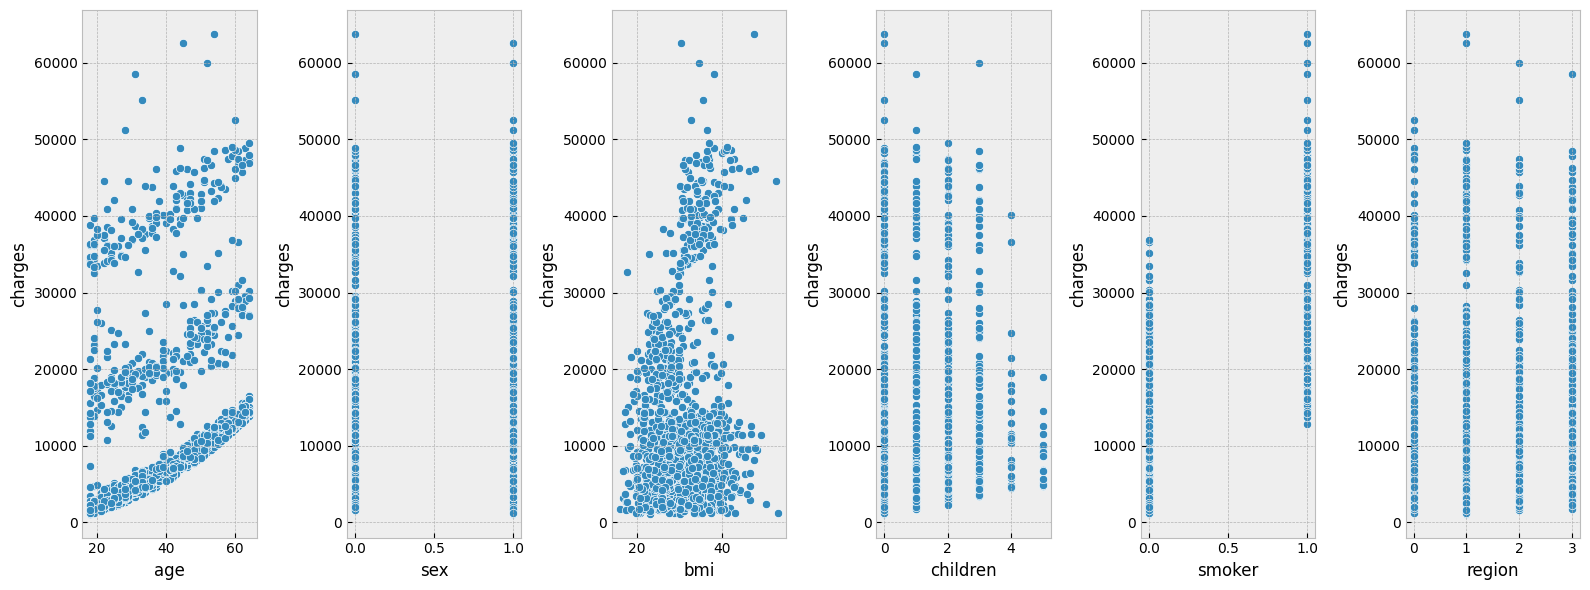

In [732]:
fig, axes = plt.subplots(1, 6, figsize=(16, 6))

sns.scatterplot(data=df, x='age', y='charges', ax=axes[0])
sns.scatterplot(data=df, x='sex', y='charges', ax=axes[1])
sns.scatterplot(data=df, x='bmi', y='charges', ax=axes[2])
sns.scatterplot(data=df, x='children', y='charges', ax=axes[3])
sns.scatterplot(data=df, x='smoker', y='charges', ax=axes[4])
sns.scatterplot(data=df, x='region', y='charges', ax=axes[5])

plt.tight_layout()

## Corr√©lations


There are 4 lowly correlated values and 1 highly correlated value with Charges:
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
Name: charges, dtype: float64


<Axes: >

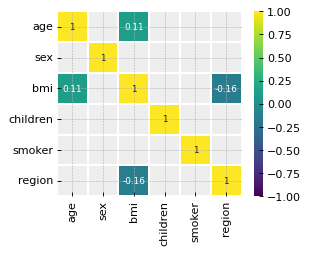

In [733]:
dfcorr = df.corr()['charges'][:-1]
golden_features_list = dfcorr.sort_values(ascending=False)
print(
    "\nThere are {} lowly correlated values and 1 highly correlated value with Charges:\n{}"
    .format(len(golden_features_list) - 2, golden_features_list))

corr = df.drop('charges',
               axis=1).corr()  # We already examined Charges correlations
plt.figure(figsize=(4, 3), dpi=80)

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)],
            cmap='viridis',
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={"size": 8},
            square=True)

Les variables sont tr√®s peu corr√©l√©es. Mesurons les colin√©arit√©s par les facteurs d‚Äôinflation de la variance.

Conclusion : si on enl√®ve des donn√©es inutiles ou pas ?

## Split du jeu de donn√©es en jeu d'entra√Ænement et de test

Nous allons d√©buter par diviser notre jeu de donn√©es en un jeu d'entra√Ænement et un jeu de tests
30% des donn√©es seront de test, et 70% seront d'entra√Ænement.
Le random_state = 42 nous garantie que les m√™mes jeux de donn√©es sont obtenues √† chaque ex√©cution du code. C'est particuli√®rement important pour la reproductibilit√© des r√©sultats dans les exp√©riences de machine learning. Nous l'avons fix√© arbitrairement √† 42.

In [734]:
X = df.drop(['charges'], axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

X_train: un DataFrame contenant les donn√©es d'entra√Ænement pour les variables explicatives (toutes les colonnes de 'df' √† l'exception de 'charges').
y_train: une s√©rie contenant les donn√©es d'entra√Ænement pour la variable cible (la colonne 'charges').
X_test: un DataFrame contenant les donn√©es de test pour les variables explicatives.
y_test: une s√©rie contenant les donn√©es de test pour la variable cible.

Nous allons maintenant entra√Æner un mod√®le √† trouver un lien entre y_train (sorites) et X_train (entr√©es)

# Entra√Ænement

## Construction des mod√®les


Nous d√©butons par le mod√®le de r√©gression lin√©aire car c'est l'une des m√©thodes de r√©gression les plus simples. L'un de ses principaux avantages est la facilit√© d'interpr√©tation des r√©sultats.

### Mod√®le de r√©gression lin√©aire

In [735]:
# Cr√©ation d'un objet modeleRegressionLineaire de r√©gression lin√©aire
modeleRegressionLineaire = LinearRegression()

# Entra√Ænement du mod√®le sur les donn√©es d'entra√Ænement
#Pour obtenir les meilleures pond√©rations, une minimisation de la somme des carr√©s des r√©sidus (SSR) sera cherch√©e, pour toutes les observations.
# Il s'agit de la m√©thode des moindres carr√©s ordinaires.
modeleRegressionLineaire.fit(X_train, y_train)

LinearRegression()

### Mod√®le de r√©gression lasso

Nous commen√ßons par effectuer une mise √† l'√©chelle de notre jeu de donn√©es, afin de ne pas p√©naliser les valeurs √©lev√©es avec la mise en place d'un hyperparam√®tre alpha.

In [736]:
scale = StandardScaler()

X_trainScaled = scale.fit_transform(X_train)
X_testScaled = scale.fit_transform(X_test)

Puis, afin de choisir le meilleur hyperparam√®tre alpha, nous allons effectuer une "K Fold Cross-Validation"

In [737]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

kf = KFold(n_splits=10, shuffle=True)

#Valeurs de alpha √† tester
alphas = [0.001, 0.01, 0.1, 1, 5, 10, 50, 75, 100, 500, 1000]
scores = []

for alpha in alphas:
    # Initialiser une liste pour stocker les scores de validation pour ce mod√®le
    alpha_scores = []
    # Parcourir les diff√©rentes it√©rations de la validation crois√©e
    for train_index, val_index in kf.split(X_trainScaled, y_train):
        # Extraire les donn√©es d'entra√Ænement et de validation pour cette it√©ration
        X_train_fold, X_val_fold = X_trainScaled[train_index], X_trainScaled[val_index]
        y_train_fold, y_val_fold = y_train.values[train_index], y_train.values[val_index]
       
        # Cr√©er un mod√®le Lasso avec l'alpha actuel et entra√Æner le mod√®le sur les donn√©es d'entra√Ænement
        modeleRegressionLineaireLasso = Lasso(alpha=alpha)
        modeleRegressionLineaireLasso.fit(X_train_fold, y_train_fold)
        # Calculer le score de validation pour ce mod√®le et l'ajouter √† la liste des scores pour cette alpha
        score = modeleRegressionLineaireLasso.score(X_val_fold, y_val_fold)
        alpha_scores.append(score)
    # Calculer la moyenne des scores de validation pour ce mod√®le et l'ajouter √† la liste des scores pour tous les alphas
    mean_score = np.mean(alpha_scores)
    scores.append(mean_score)

# Trouver l'alpha qui donne le meilleur score de validation
best_alpha_lasso = alphas[np.argmax(scores)]   
print("Pour Lasso, le meilleur alpha est : ",best_alpha_lasso)

Pour Lasso, le meilleur alpha est :  0.01


### Mod√®le de r√©gression ridge

Nous allons utiliser les jeux d'entra√Ænement mis √† l'√©chelle, et effectuer une "K Fold Cross-Validation"

In [738]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

kf = KFold(n_splits=10, shuffle=True)

#Valeurs de alpha √† tester
alphas = [0.001, 0.01, 0.1, 1, 5, 10, 50, 75, 100, 500, 1000]
scores = []

for alpha in alphas:
    # Initialiser une liste pour stocker les scores de validation pour ce mod√®le
    alpha_scores = []
    # Parcourir les diff√©rentes it√©rations de la validation crois√©e
    for train_index, val_index in kf.split(X_trainScaled, y_train):
        # Extraire les donn√©es d'entra√Ænement et de validation pour cette it√©ration

        X_train_fold, X_val_fold = X_trainScaled[train_index], X_trainScaled[val_index]
        y_train_fold, y_val_fold = y_train.values[train_index], y_train.values[val_index]
       
        # Cr√©er un mod√®le Ridge avec l'alpha actuel et entra√Æner le mod√®le sur les donn√©es d'entra√Ænement
        modeleRegressionLineaireRidge = Ridge(alpha=alpha)
        modeleRegressionLineaireRidge.fit(X_train_fold, y_train_fold)
        # Calculer le score de validation pour ce mod√®le et l'ajouter √† la liste des scores pour cette alpha
        score = modeleRegressionLineaireRidge.score(X_val_fold, y_val_fold)
        alpha_scores.append(score)
    # Calculer la moyenne des scores de validation pour ce mod√®le et l'ajouter √† la liste des scores pour tous les alphas
    mean_score = np.mean(alpha_scores)
    scores.append(mean_score)

# Trouver l'alpha qui donne le meilleur score de validation
best_alpha_ridge = alphas[np.argmax(scores)]   
print("Pour Ridge, le meilleur alpha est : ",best_alpha_ridge)

Pour Ridge, le meilleur alpha est :  1


### Ce que disent les mod√®les


In [739]:
for idx, col_name in enumerate(X_train.columns):
    print("Coefficients Betas de {} =>\n[regression Lasso alpha = ",best_alpha_lasso," {}\n[regression Ridge alpha = ",best_alpha_ridge,"] {} \n".format(
        col_name, modeleRegressionLineaire.coef_[idx], modeleRegressionLineaireLasso.coef_[idx],modeleRegressionLineaireRidge.coef_[idx]))

Coefficients Betas de {} =>
[regression Lasso alpha =  0.01  {}
[regression Ridge alpha 1 ] age 

Coefficients Betas de {} =>
[regression Lasso alpha =  0.01  {}
[regression Ridge alpha 1 ] sex 

Coefficients Betas de {} =>
[regression Lasso alpha =  0.01  {}
[regression Ridge alpha 1 ] bmi 

Coefficients Betas de {} =>
[regression Lasso alpha =  0.01  {}
[regression Ridge alpha 1 ] children 

Coefficients Betas de {} =>
[regression Lasso alpha =  0.01  {}
[regression Ridge alpha 1 ] smoker 

Coefficients Betas de {} =>
[regression Lasso alpha =  0.01  {}
[regression Ridge alpha 1 ] region 



Les variables age, sex, bmi et region ont toutes un effet positif sur la variable cible Charges, et le nombre d'enfants ainsi que le tabagisme ont un effet encore plus positif. Il convient √©galement de noter que le coefficient de la variable smoker est beaucoup plus √©lev√© que celui des autres variables, ce qui indique que le mod√®le consid√®re que le tabagisme a un effet beaucoup plus important sur les co√ªts de sant√© que les autres variables.

In [740]:
for idx, col_name in enumerate(X_train.columns):
    print("Valeurs intercept de {} =>\n[regression Lasso alpha = ",best_alpha_lasso,"] {}\n[regression Ridge alpha = ",best_alpha_ridge,"] {} \n".format(
        col_name, modeleRegressionLineaire.intercept_, modeleRegressionLineaireLasso.intercept_,modeleRegressionLineaireRidge.intercept_))

Valeurs intercept de {} =>
[regression Lasso alpha =  0.01  {}
[regression Ridge alpha 1 ] age 

Valeurs intercept de {} =>
[regression Lasso alpha =  0.01  {}
[regression Ridge alpha 1 ] sex 

Valeurs intercept de {} =>
[regression Lasso alpha =  0.01  {}
[regression Ridge alpha 1 ] bmi 

Valeurs intercept de {} =>
[regression Lasso alpha =  0.01  {}
[regression Ridge alpha 1 ] children 

Valeurs intercept de {} =>
[regression Lasso alpha =  0.01  {}
[regression Ridge alpha 1 ] smoker 

Valeurs intercept de {} =>
[regression Lasso alpha =  0.01  {}
[regression Ridge alpha 1 ] region 



Ce r√©sultat indique que lorsque toutes les variables explicatives (√¢ge, sexe, IMC, nombre d'enfants, tabagisme et r√©gion) sont nulles, la charge moyenne pour une personne est d'environ -13252,02 euros. On ne peut pas vraiment interpreter cette valeur car cette situation ne peut pas se r√©aliser.

### Evaluation quantitative des mod√®les

Nous commencons par calculer le coefficient de d√©termination R¬≤ du mod√®le.
Il indique dans quelle mesure la variation de ùë¶ peut √™tre expliqu√©e par la d√©pendance √† X, en utilisant le mod√®le de r√©gression en question. Un R¬≤ plus grand indique une meilleure ad√©quation et signifie que le mod√®le peut mieux expliquer la variation de la production avec diff√©rentes entr√©es. Par exemple, un ùëÖ¬≤√©gal √† 1 corresponds √† SSR = 0. Il s'agit d'un ajustement parfait, puisque les valeurs des r√©ponses pr√©dites et r√©elles s'accordent parfaitement entre elles.

In [741]:
for idx, col_name in enumerate(X_train.columns):
    print("Scores de {} =>\n[regression lin√©aire] {} \n[regression Lasso alpha = {}] {}\n[regression Ridge alpha = {}] {}\n".format(
        col_name,modeleRegressionLineaire.score(X_test, y_test),
        best_alpha_lasso, modeleRegressionLineaireLasso.score(X_test, y_test),
        best_alpha_ridge, modeleRegressionLineaireRidge.score(X_test, y_test)))

Scores de age =>
[regression lin√©aire] 0.7694415927057693 
[regression Lasso alpha = 0.01] -150.65451170043156
[regression Ridge alpha = 1] -68.14704471644178

Scores de sex =>
[regression lin√©aire] 0.7694415927057693 
[regression Lasso alpha = 0.01] -150.65451170043156
[regression Ridge alpha = 1] -68.14704471644178

Scores de bmi =>
[regression lin√©aire] 0.7694415927057693 
[regression Lasso alpha = 0.01] -150.65451170043156
[regression Ridge alpha = 1] -68.14704471644178

Scores de children =>
[regression lin√©aire] 0.7694415927057693 
[regression Lasso alpha = 0.01] -150.65451170043156
[regression Ridge alpha = 1] -68.14704471644178

Scores de smoker =>
[regression lin√©aire] 0.7694415927057693 
[regression Lasso alpha = 0.01] -150.65451170043156
[regression Ridge alpha = 1] -68.14704471644178

Scores de region =>
[regression lin√©aire] 0.7694415927057693 
[regression Lasso alpha = 0.01] -150.65451170043156
[regression Ridge alpha = 1] -68.14704471644178



C:\Users\33660\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
C:\Users\33660\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\33660\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
C:\Users\33660\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
 

Un R¬≤ de 0,76 indique que le mod√®le de r√©gression lin√©aire est capable d'expliquer 76% de la variance de la variable cible en utilisant les variables explicatives. Le mod√®le est donc relativement performant.
En revanche, R¬≤ ne suffit pas √† √©valuer la qualit√© du mod√®le.

### Evaluation qualitative des mod√®les

On peut voir que le mod√®le suit plus ou moins la droite des y=x pour des charges inf√©ireures √† 15 000 euros, mais apr√®s, les valeurs s'√©loignent plus de cette droite.

In [742]:
predictionChargesRegressionLineaires = modeleRegressionLineaireLasso.predict(X_test)
predictionChargesRegressionLineairesLasso = modeleRegressionLineaireLasso.predict(X_testScaled)
predictionChargesRegressionLineairesRidge = modeleRegressionLineaireRidge.predict(X_testScaled)

C:\Users\33660\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Text(0.5, 0.98, 'Dispersion des r√©sidus')

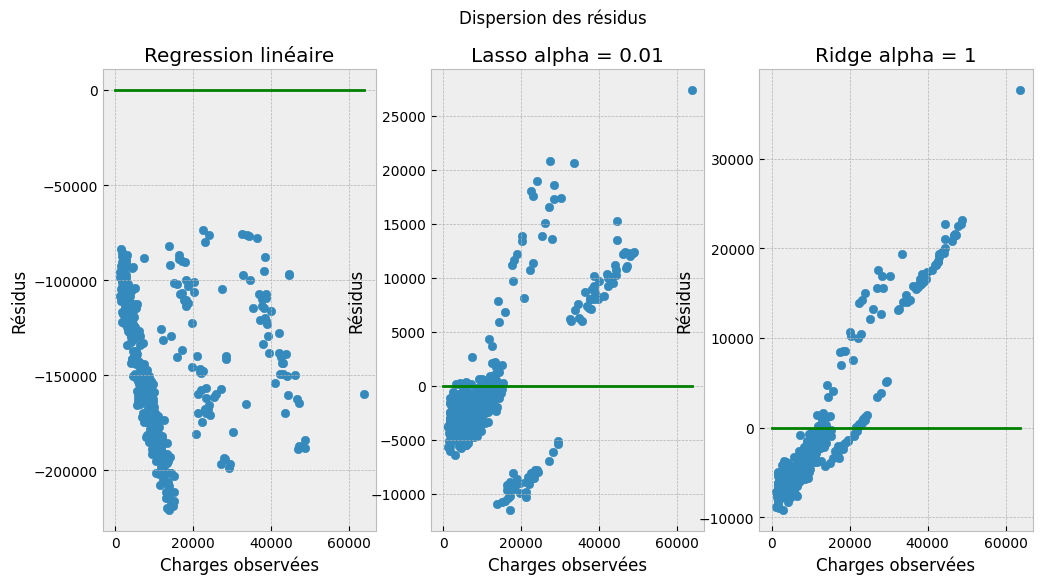

In [744]:
residusRegressionLineaire = y_test - predictionChargesRegressionLineaires
residusRegressionLasso = y_test - predictionChargesRegressionLineairesLasso
residusRegressionRidge = y_test - predictionChargesRegressionLineairesRidge


fig, axes = plt.subplots(1, 3, figsize=(12, 6)) # sp√©cifie la taille de la figure
axes[0].scatter(y_test, residusRegressionLineaire)
axes[0].set_xlabel("Charges observ√©es")
axes[0].set_ylabel("R√©sidus")
axes[0].set_title("Regression lin√©aire")
axes[0].plot([0, max(y_test)], [0, 0], color='g')

axes[1].scatter(y_test, residusRegressionLasso)
axes[1].set_xlabel("Charges observ√©es")
axes[1].set_ylabel("R√©sidus")
axes[1].set_title("Lasso alpha = {}".format(best_alpha_lasso))
axes[1].plot([0, max(y_test)], [0, 0], color='g')

axes[2].scatter(y_test, residusRegressionRidge)
axes[2].set_xlabel("Charges observ√©es")
axes[2].set_ylabel("R√©sidus")
axes[2].set_title("Ridge alpha = {}".format(best_alpha_ridge))
axes[2].plot([0, max(y_test)], [0, 0], color='g')

fig.suptitle("Dispersion des r√©sidus")

On peut observer des valeurs de r√©sidus tr√®s importantes. A ce stade, on ne peut pas toutes les supprimer puisqu'on se rend compte qu'elles sont trop nombreuses. On voit particuli√®rement un groupe d'outliers autour des charges pr√©dites √† 30 000 euros, avec des r√©sidus de -10 000 euros, signifiant que notre mod√®le a surestim√© de 10 000 euros les charges, ce qui est tr√®s excessif. On peut aussi observer des valeurs d'extr√™mes sous-estimations d'environ 20 000 euros pour des pr√©dictions de 10 000 euros.

In [ ]:
print("Moyenne des r√©sidus =>\n[regression lin√©aire]{}\n[regression Lasso alpha = ",best_alpha_lasso,"] {}\n[regression Ridge alpha = ",best_alpha_ridge,"]".format(
    statistics.mean(residusRegressionLineaire), statistics.mean(residusRegressionLasso), statistics.mean(residusRegressionRidge)))

print("Variance des r√©sidus =>\n[regression lin√©aire]{}\n[regression Lasso alpha = ",best_alpha_lasso,"]{}\n[regression Ridge alpha = ",best_alpha_ridge,"]".format(
    statistics.variance(residusRegressionLineaire), statistics.variance(residusRegressionLasso), statistics.variance(residusRegressionRidge)))

Moyenne des r√©sidus =>
[regression lin√©aire]{}
[regression Lasso alpha =  0.001 ] {}
[regression Ridge alpha =  10 ]
Variance des r√©sidus =>
[regression lin√©aire]{}
[regression Lasso alpha =  0.001 ]{}
[regression Ridge alpha =  10 ]


Aussi, on voit que la variance des r√©sidus n'est pas homog√®ne.

Nous allons visualiser la distribution des erreurs de pr√©diction de notre mod√®le de r√©gression lin√©aire, c'est-√†-dire la diff√©rence entre les valeurs r√©elles de la variable cible (y_test) et les valeurs pr√©dites par le mod√®le (predictionChargesRegressionLineaires).
Si l'histogramme des √©carts obtenus est centr√© autour de z√©ro et suit une distribution normale, cela signifie que les erreurs de pr√©diction sont faibles et que notre mod√®le est capable de faire des pr√©dictions pr√©cises. En revanche, si l'histogramme pr√©sente une distribution asym√©trique ou est centr√© autour d'une valeur non nulle, cela peut indiquer la pr√©sence de biais ou d'erreurs syst√©matiques dans notre mod√®le.

Text(0.5, 0.98, 'R√©partition des r√©sidus')

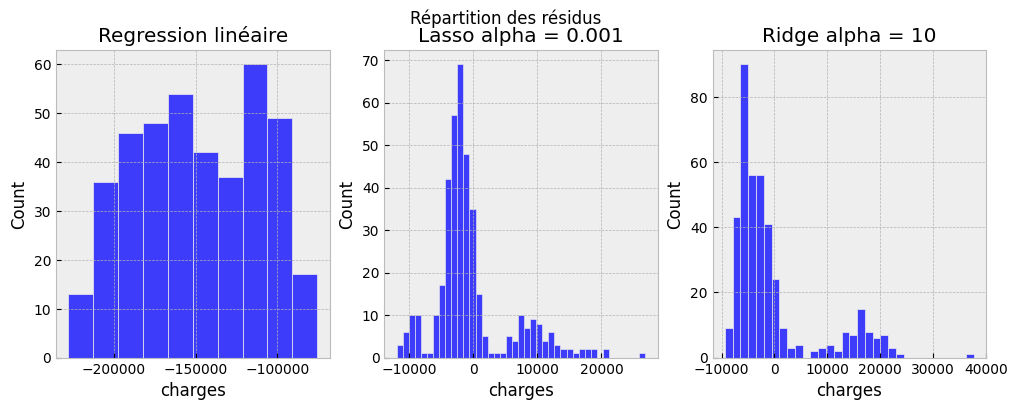

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4)) # sp√©cifie la taille de la figure

# Tracer l'histogramme pour la r√©gression lin√©aire
sns.histplot(residusRegressionLineaire, color='blue', ax=axes[0])
axes[0].set_title("Regression lin√©aire")

# Tracer l'histogramme pour la r√©gression Lasso
sns.histplot(residusRegressionLasso, color='blue', ax=axes[1])
axes[1].set_title("Lasso alpha = {}".format(best_alpha_lasso))

# Tracer l'histogramme pour la r√©gression Ridge
sns.histplot(residusRegressionRidge, color='blue', ax=axes[2])
axes[2].set_title("Ridge alpha = {}".format(best_alpha_ridge))

plt.suptitle("R√©partition des r√©sidus")

Text(0.5, 0.98, 'Mise en parall√®le des valeurs pr√©dites et observ√©es')

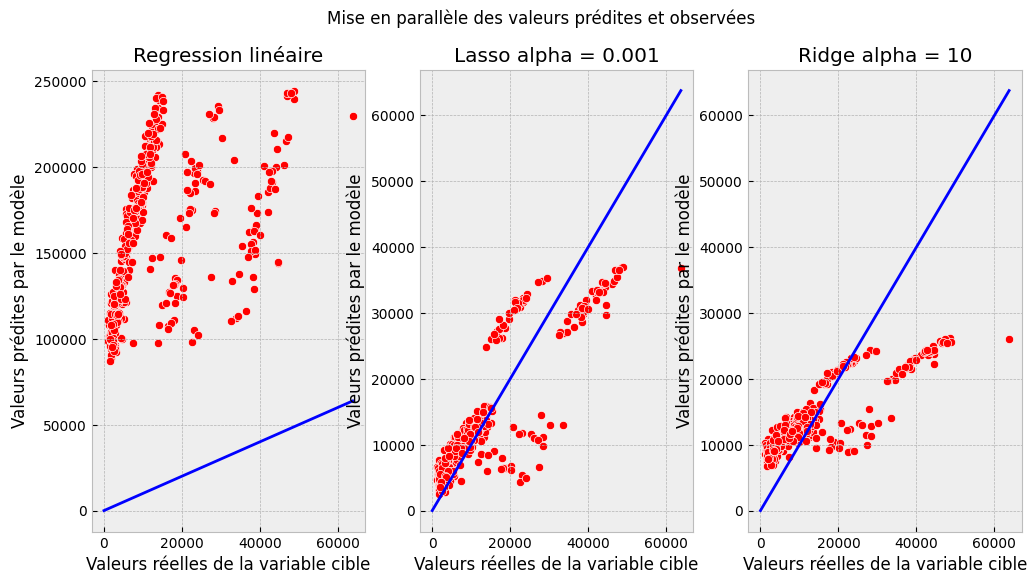

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6)) # sp√©cifie la taille de la figure
sns.scatterplot(ax=axes[0], x=y_test, y=predictionChargesRegressionLineaires, color='r')
axes[0].set_xlabel("Valeurs r√©elles de la variable cible")
axes[0].set_ylabel("Valeurs pr√©dites par le mod√®le")
axes[0].set_title("Regression lin√©aire")
axes[0].plot([0, max(y_test)], [0, max(y_test)], color='b')

sns.scatterplot(ax=axes[1], x=y_test, y=predictionChargesRegressionLineairesLasso, color='r')
axes[1].set_xlabel("Valeurs r√©elles de la variable cible")
axes[1].set_ylabel("Valeurs pr√©dites par le mod√®le")
axes[1].set_title("Lasso alpha = {}".format(best_alpha_lasso))
axes[1].plot([0, max(y_test)], [0, max(y_test)], color='b')

sns.scatterplot(ax=axes[2], x=y_test, y=predictionChargesRegressionLineairesRidge, color='r')
axes[2].set_xlabel("Valeurs r√©elles de la variable cible")
axes[2].set_ylabel("Valeurs pr√©dites par le mod√®le")
axes[2].set_title("Ridge alpha = {}".format(best_alpha_ridge))
axes[2].plot([0, max(y_test)], [0, max(y_test)], color='b')

plt.suptitle("Mise en parall√®le des valeurs pr√©dites et observ√©es")

Text(0.5, 1.0, 'Ridge alpha = 10')

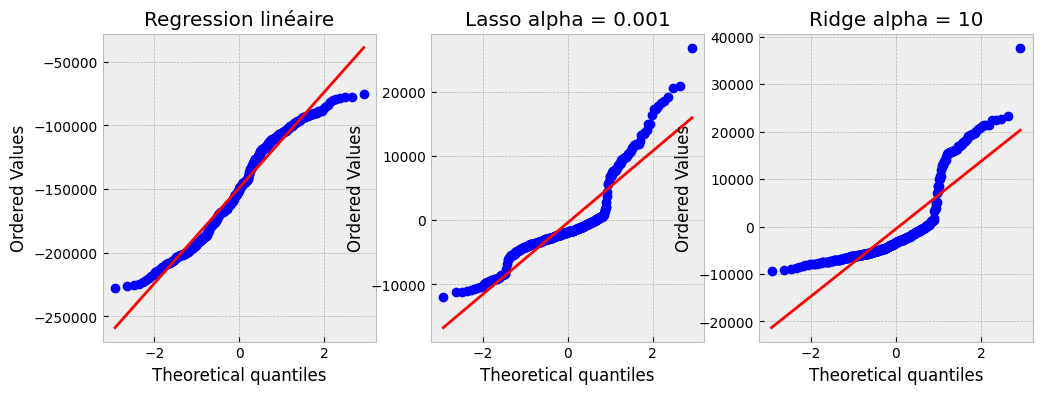

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12,4)) # sp√©cifie la taille de la figure

# Tracer le graphique de probabilit√© normale pour la r√©gression lin√©aire
_, (_, _, r) = sp.stats.probplot(residusRegressionLineaire, fit=True, plot=axes[0])
axes[0].set_title('Regression lin√©aire')

# Tracer le graphique de probabilit√© normale pour la r√©gression lin√©aire Lasso
_, (_, _, r) = sp.stats.probplot(residusRegressionLasso, fit=True, plot=axes[1])
axes[1].set_title("Lasso alpha = {}".format(best_alpha_lasso))

# Tracer le graphique de probabilit√© normale pour la r√©gression lin√©aire Ridge
_, (_, _, r) = sp.stats.probplot(residusRegressionRidge, fit=True, plot=axes[2])
axes[2].set_title("Ridge alpha = {}".format(best_alpha_ridge))

#### Homost√©dasticit√©

Text(0.5, 1.0, 'Ridge alpha = 1')

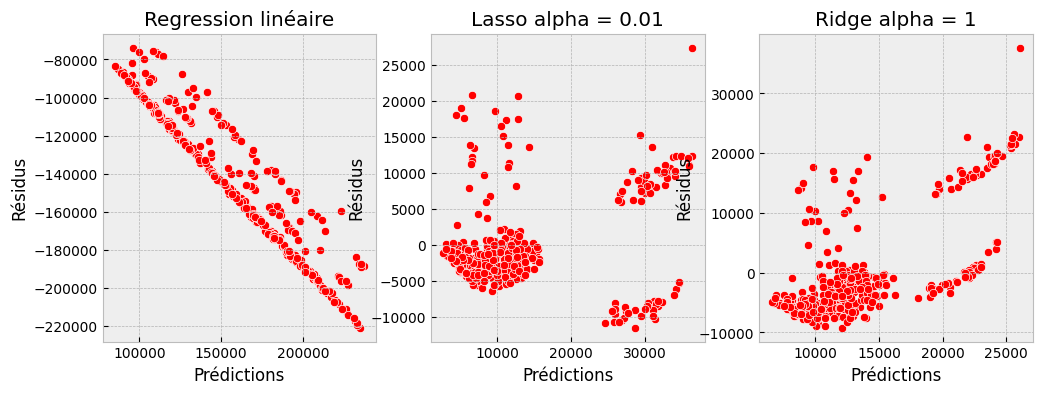

In [745]:
fig, axes = plt.subplots(1, 3, figsize=(12,4)) # sp√©cifie la taille de la figure

# Tracer la dispersion des r√©sidus pour la r√©gression lin√©aire
sns.scatterplot(y=residusRegressionLineaire, x=predictionChargesRegressionLineaires, color='r', ax=axes[0])
axes[0].set_xlabel("Pr√©dictions")
axes[0].set_ylabel("R√©sidus")
axes[0].set_title("Regression lin√©aire")

# Tracer la dispersion des r√©sidus pour la r√©gression lin√©aire Lasso
sns.scatterplot(y=residusRegressionLasso, x=predictionChargesRegressionLineairesLasso, color='r', ax=axes[1])
axes[1].set_xlabel("Pr√©dictions")
axes[1].set_ylabel("R√©sidus")
axes[1].set_title("Lasso alpha = {}".format(best_alpha_lasso))

# Tracer la dispersion des r√©sidus pour la r√©gression lin√©aire Ridge
sns.scatterplot(y=residusRegressionRidge, x=predictionChargesRegressionLineairesRidge, color='r', ax=axes[2])
axes[2].set_xlabel("Pr√©dictions")
axes[2].set_ylabel("R√©sidus")
axes[2].set_title("Ridge alpha = {}".format(best_alpha_ridge))

On peut conclure que le mod√®le de r√©gression lin√©naire Lasso n'a pas am√©lior√© la pr√©diction du jeu de tests par rapport au mod√®le de r√©gression lin√©aire. Nous allons donc maintenant passder √† un autre mod√®le : le mod√®le de r√©gression lin√©aire Ridge, et l'√©valuer quantitativement et qualitativement par rapport √† la r√©gression lin√©aire Lasso, qui a tout de m√™me un tout petit peu r√©duit les valeurs des coefficients Beta, en minimisant leur norme 2 avec un alpha √©gal √† 1.